In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
credit_risk = pd.read_csv('credit_risk_dataset.csv')
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
credit_risk.shape

(32581, 12)

In [5]:
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
credit_risk_copy = credit_risk.copy()

In [7]:
credit_risk.pivot_table(index='person_age', columns='loan_status', values='person_income', aggfunc='count').reset_index().sort_values(by='person_age', ascending=False)

loan_status,person_age,0,1
57,144,3.0,NaN
56,123,2.0,NaN
55,94,1.0,NaN
54,84,1.0,NaN
53,80,1.0,NaN
52,78,1.0,NaN
51,76,1.0,NaN
50,73,3.0,NaN
49,70,5.0,2.0
48,69,5.0,NaN


In [8]:
cr_age_rmvd = credit_risk_copy[credit_risk_copy['person_age'] <= 70]
cr_age_rmvd.reset_index(inplace=True, drop=True)
cr_age_rmvd.shape

(32568, 12)

In [9]:
cr_age_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [10]:
credit_risk.pivot_table(index='person_emp_length', columns='loan_status', values='person_income', aggfunc='count').reset_index().sort_values(by='person_emp_length', ascending=False)

loan_status,person_emp_length,0,1
35,123.0,1.0,1.0
34,41.0,1.0,NaN
33,38.0,1.0,NaN
32,34.0,NaN,1.0
31,31.0,4.0,NaN
30,30.0,1.0,1.0
29,29.0,NaN,1.0
28,28.0,3.0,NaN
27,27.0,4.0,1.0
26,26.0,5.0,1.0


In [11]:
person_emp_rmvd = cr_age_rmvd[cr_age_rmvd['person_emp_length'] <= 70]
person_emp_rmvd.reset_index(inplace=True, drop=True)
person_emp_rmvd.shape

(31671, 12)

In [12]:
person_emp_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [13]:
person_emp_rmvd.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31671.000000,3.167100e+04,31671.000000,31671.000000,28626.000000,31671.000000,31671.000000,31671.000000
mean,27.717754,6.649231e+04,4.780714,9660.637492,11.040070,0.215497,0.169621,5.804395
std,6.159859,5.277413e+04,4.028718,6334.716643,3.229507,0.411173,0.106275,4.048776
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [14]:
person_emp_rmvd.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3045
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Here we are trying to fill the missing values of `loan_int_rate` with the mean

In [15]:
cr_data = person_emp_rmvd.copy()

In [16]:
cr_data.fillna({'loan_int_rate': cr_data['loan_int_rate'].median()}, inplace=True)

In [17]:
cr_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [18]:
cr_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31671.000000,3.167100e+04,31671.000000,31671.000000,31671.000000,31671.000000,31671.000000,31671.000000
mean,27.717754,6.649231e+04,4.780714,9660.637492,11.035256,0.215497,0.169621,5.804395
std,6.159859,5.277413e+04,4.028718,6334.716643,3.070364,0.411173,0.106275,4.048776
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [19]:
cr_data.groupby('loan_status')['person_income'].count()

loan_status
0    24846
1     6825
Name: person_income, dtype: int64

In [20]:
6825 / (6825 + 24846) * 100

21.54968267500237

**Let have a look on the categorical data**

In [21]:
cr_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [22]:
cr_data.groupby('person_home_ownership')['loan_intent'].count()

person_home_ownership
MORTGAGE    13088
OTHER         107
OWN          2410
RENT        16066
Name: loan_intent, dtype: int64

In [23]:
cr_data.groupby('loan_intent')['person_home_ownership'].count()

loan_intent
DEBTCONSOLIDATION    5064
EDUCATION            6288
HOMEIMPROVEMENT      3510
MEDICAL              5891
PERSONAL             5365
VENTURE              5553
Name: person_home_ownership, dtype: int64

In [24]:
cr_data.groupby('loan_grade')['person_home_ownership'].count()

loan_grade
A    10365
B    10181
C     6318
D     3555
E      952
F      236
G       64
Name: person_home_ownership, dtype: int64

In [25]:
cr_data_copy = cr_data.drop(['loan_grade'], axis=1)
cr_data_copy.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


## HANDLING CATEGORICAL COLUMNS

In [26]:
cr_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31671 entries, 0 to 31670
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31671 non-null  int64  
 1   person_income               31671 non-null  int64  
 2   person_home_ownership       31671 non-null  object 
 3   person_emp_length           31671 non-null  float64
 4   loan_intent                 31671 non-null  object 
 5   loan_amnt                   31671 non-null  int64  
 6   loan_int_rate               31671 non-null  float64
 7   loan_status                 31671 non-null  int64  
 8   loan_percent_income         31671 non-null  float64
 9   cb_person_default_on_file   31671 non-null  object 
 10  cb_person_cred_hist_length  31671 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [27]:
cr_data_cat_treated = cr_data_copy.copy()

In [28]:
cr_data_cat_treated.groupby('cb_person_default_on_file')['person_age'].count()

cb_person_default_on_file
N    26043
Y     5628
Name: person_age, dtype: int64

In [29]:
person_home_ownership = pd.get_dummies(cr_data_cat_treated['person_home_ownership'], drop_first=True).astype(int)
person_home_ownership.head()

,OTHER,OWN,RENT
0,0,1,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,1,0


In [30]:
loan_intent = pd.get_dummies(cr_data_cat_treated['loan_intent'], drop_first=True).astype(int)
loan_intent.head()

,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1


**We are converting `cb_person_default_on_file` in a binary object in such a way that where ever there is `N`we replace with 0 and where ever there is `Y` with replace it ith 1**

In [31]:
cr_data_cat_treated['cb_person_default_on_file_binary'] = np.where(cr_data_cat_treated['cb_person_default_on_file'] == 'Y', 1, 0)
cr_data_cat_treated.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,cb_person_default_on_file_binary
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,0
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,0
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,1
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,0


In [32]:
data_scale = cr_data_cat_treated.drop(['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_status', 'cb_person_default_on_file_binary'], axis=1)

In [33]:
data_scale.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,21,9600,5.0,1000,11.14,0.10,2
1,25,9600,1.0,5500,12.87,0.57,3
2,23,65500,4.0,35000,15.23,0.53,2
3,24,54400,8.0,35000,14.27,0.55,4
4,21,9900,2.0,2500,7.14,0.25,2


**Now here we are to doing the scaling because we don't want that the model interpret the values of each colomn while losing thier real significance**

In [34]:
scaler = StandardScaler()

In [35]:
data_scale.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [36]:
scaled_data = scaler.fit_transform(data_scale)
scaled_data

array([[-1.09058679, -1.07805103,  0.05443152, ...,  0.03411508,
        -0.655113  , -0.93965566],
       [-0.44121099, -1.07805103, -0.93845588, ...,  0.59757502,
         3.76746129, -0.69266353],
       [-0.76589889, -0.01880318, -0.19379033, ...,  1.36622557,
         3.39107199, -0.93965566],
       ...,
       [ 6.05254702,  0.18016109, -0.44201218, ..., -0.01473982,
         2.73239071,  5.48213962],
       [ 4.59145147,  1.58238543,  0.05443152, ...,  0.14485288,
        -0.655113  ,  4.98815537],
       [ 6.21489097, -0.46410415, -0.69023403, ..., -0.34043921,
        -0.18462637,  5.97612388]])

**Now we have to covert the array back to a data frame**

In [37]:
scaled_df = pd.DataFrame(scaled_data, columns=data_scale.columns)
scaled_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656


In [38]:
round(np.mean(scaled_df['person_income']), 2)

0.0

In [39]:
round(np.std(scaled_df['person_income']), 2)

1.0

In [40]:
scaled_df.shape

(31671, 7)

In [41]:
scaled_data_combined = pd.concat([scaled_df, person_home_ownership, loan_intent, cr_data_cat_treated['cb_person_default_on_file_binary'], cr_data_cat_treated['loan_status']], axis=1)

In [42]:
scaled_data_combined

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file_binary,loan_status
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656,0,1,0,1,0,0,0,0,0,0
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664,0,0,0,0,0,1,0,0,0,1
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656,0,0,1,0,0,1,0,0,0,1
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671,0,0,1,0,0,1,0,0,1,1
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31666,4.753795,-0.255665,-0.938456,-0.609451,0.692028,-0.561016,5.976124,0,0,0,0,0,0,1,0,0,0
31667,4.266764,1.013916,-0.193790,1.257276,-1.154688,-0.184626,3.259210,0,0,0,0,0,0,1,0,0,0
31668,6.052547,0.180161,-0.442012,4.000141,-0.014740,2.732391,5.482140,0,0,1,0,1,0,0,0,0,1
31669,4.591451,1.582385,0.054432,0.842886,0.144853,-0.655113,4.988155,0,0,0,0,0,0,1,0,0,0


In [43]:
scaled_data_combined.shape

(31671, 17)

Let check the distribution of our target columns

In [44]:
scaled_data_combined.groupby('loan_status')['EDUCATION'].count()

loan_status
0    24846
1     6825
Name: EDUCATION, dtype: int64

In [45]:
target = scaled_data_combined['loan_status']
features = scaled_data_combined.drop(['loan_status'], axis=1)
features.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file_binary
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656,0,1,0,1,0,0,0,0,0
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664,0,0,0,0,0,1,0,0,0
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656,0,0,1,0,0,1,0,0,0
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671,0,0,1,0,0,1,0,0,1
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656,0,1,0,0,0,0,0,1,0


## HANDELING UNBALANCED DATASET NATURE

**SMOTE means Sythetic Oversampling Minority Technique**

In [46]:
smote = SMOTE()

In [47]:
balanced_features, balanced_target = smote.fit_resample(features, target)

In [48]:
balanced_features.shape

(49692, 16)

In [49]:
balanced_target.shape

(49692,)

In [50]:
49692 - 31671

18021

In [51]:
scaled_data_combined.groupby('loan_status').size()

loan_status
0    24846
1     6825
dtype: int64

In [52]:
type(balanced_target)

pandas.core.series.Series

In [53]:
balanced_target_df = pd.DataFrame({'target': balanced_target})
balanced_target_df.groupby('target').size()

target
0    24846
1    24846
dtype: int64

## MODEL BUILDING AND TRAINNING

In [56]:
X_train, X_test, y_train, y_test = train_test_split(balanced_features, balanced_target, test_size=0.2, random_state=42)

In [60]:
logreg = LogisticRegression()

In [61]:
logreg = logreg.fit(X_train, y_train)

In [62]:
logreg.score(X_train, y_train)

0.780570019872714

In [64]:
logreg_prediction = logreg.predict(X_test)

In [66]:
print(classification_report(y_test, logreg_prediction))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      4995
           1       0.78      0.78      0.78      4944

    accuracy                           0.78      9939
   macro avg       0.78      0.78      0.78      9939
weighted avg       0.78      0.78      0.78      9939



In [67]:
print(logreg.coef_)

[[-0.01946057  0.07801465 -0.02527852 -0.66508993  0.98987783  1.38877504
  -0.03128171 -0.64742354 -2.01148593  0.46339467 -1.16207974 -0.30358911
  -0.53504845 -0.95603808 -1.54235936  0.0642503 ]]


In [72]:
features_imp_logreg = pd.DataFrame({'Feature': balanced_features.columns, 'Importance': logreg.coef_[0]})
features_imp_logreg = features_imp_logreg.sort_values(by='Importance', ascending=False)
features_imp_logreg

,Feature,Importance
5,loan_percent_income,1.388775
4,loan_int_rate,0.989878
9,RENT,0.463395
1,person_income,0.078015
15,cb_person_default_on_file_binary,0.064250
0,person_age,-0.019461
2,person_emp_length,-0.025279
6,cb_person_cred_hist_length,-0.031282
11,HOMEIMPROVEMENT,-0.303589
12,MEDICAL,-0.535048


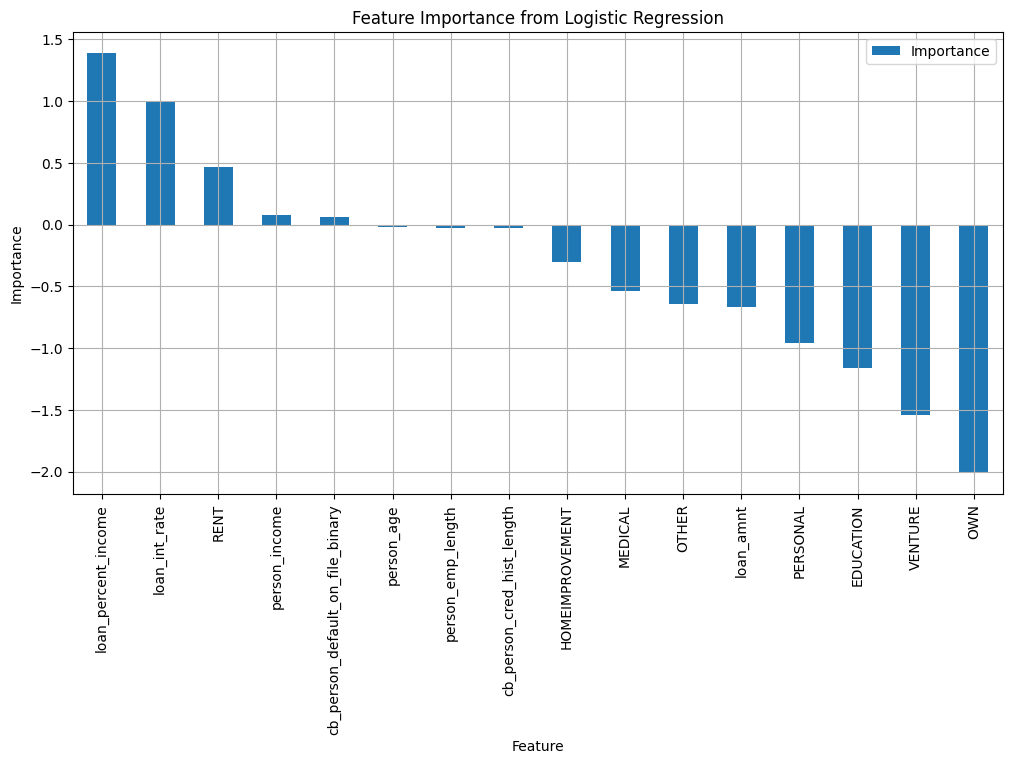

In [73]:
features_imp_logreg = pd.DataFrame({'Feature': balanced_features.columns, 'Importance': logreg.coef_[0]})
features_imp_logreg = features_imp_logreg.sort_values(by='Importance', ascending=False)
features_imp_logreg.plot(x='Feature', y='Importance', kind='bar', figsize=(12,6))
plt.title('Feature Importance from Logistic Regression')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.grid()
plt.show()

### RandomForest Model

In [75]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [76]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
rf.score(X_train, y_train)

1.0

In [79]:
rf_prediction = rf.predict(X_test)
rf_prediction

array([0, 0, 0, ..., 0, 0, 1])

In [80]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4995
           1       0.96      0.91      0.93      4944

    accuracy                           0.94      9939
   macro avg       0.94      0.94      0.94      9939
weighted avg       0.94      0.94      0.94      9939



In [81]:
print(rf.feature_importances_)

[0.06292856 0.14539649 0.07247017 0.07840869 0.20966119 0.2101529
 0.06022917 0.0004817  0.02025862 0.04787241 0.01511946 0.01623437
 0.00830157 0.01352826 0.01800812 0.02094833]


In [83]:
features_imp_rf = pd.DataFrame({'Feature': balanced_features.columns, 'Importance': rf.feature_importances_})
features_imp_rf = features_imp_rf.sort_values(by='Importance', ascending=False)
features_imp_rf

,Feature,Importance
5,loan_percent_income,0.210153
4,loan_int_rate,0.209661
1,person_income,0.145396
3,loan_amnt,0.078409
2,person_emp_length,0.072470
0,person_age,0.062929
6,cb_person_cred_hist_length,0.060229
9,RENT,0.047872
15,cb_person_default_on_file_binary,0.020948
8,OWN,0.020259


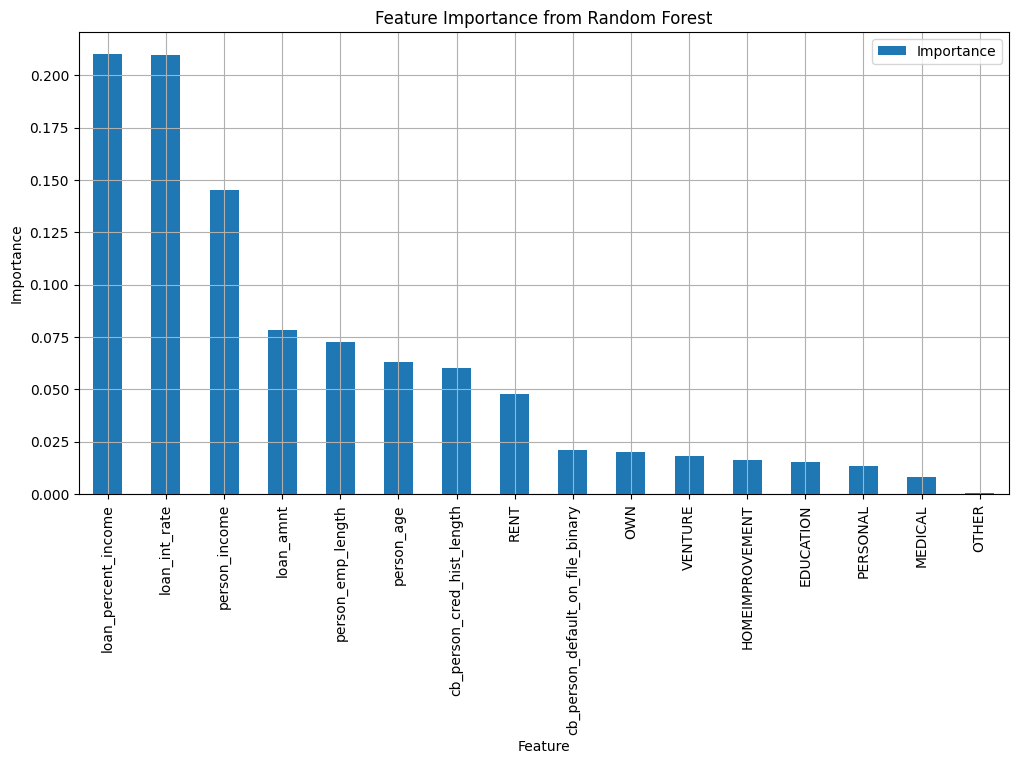

In [82]:
features_imp_rf = pd.DataFrame({'Feature': balanced_features.columns, 'Importance': rf.feature_importances_})
features_imp_rf = features_imp_rf.sort_values(by='Importance', ascending=False)
features_imp_rf.plot(x='Feature', y='Importance', kind='bar', figsize=(12,6))
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.grid()
plt.show()

### XGBoosting Model

In [85]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='exact', random_state=42)

/home/redeus/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [87]:
xgb.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [88]:
xgb.score(X_train, y_train)

0.965461726159032

In [89]:
xgb_prediction = xgb.predict(X_test)
xgb_prediction

array([0, 0, 0, ..., 0, 0, 1])

In [90]:
print(classification_report(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4995
           1       0.98      0.91      0.95      4944

    accuracy                           0.95      9939
   macro avg       0.95      0.95      0.95      9939
weighted avg       0.95      0.95      0.95      9939



In [91]:
print(xgb.feature_importances_)

[0.03983236 0.03985142 0.05658342 0.00891972 0.07490005 0.14116876
 0.07372081 0.01075268 0.168386   0.11218721 0.05480731 0.0610766
 0.01288409 0.03775797 0.0866881  0.02048347]


In [92]:
features_imp_xbg = pd.DataFrame({'Feature': balanced_features.columns, 'Importance': xgb.feature_importances_})
features_imp_xb = features_imp_xbg.sort_values(by='Importance', ascending=False)
features_imp_xbg

,Feature,Importance
0,person_age,0.039832
1,person_income,0.039851
2,person_emp_length,0.056583
3,loan_amnt,0.008920
4,loan_int_rate,0.074900
5,loan_percent_income,0.141169
6,cb_person_cred_hist_length,0.073721
7,OTHER,0.010753
8,OWN,0.168386
9,RENT,0.112187


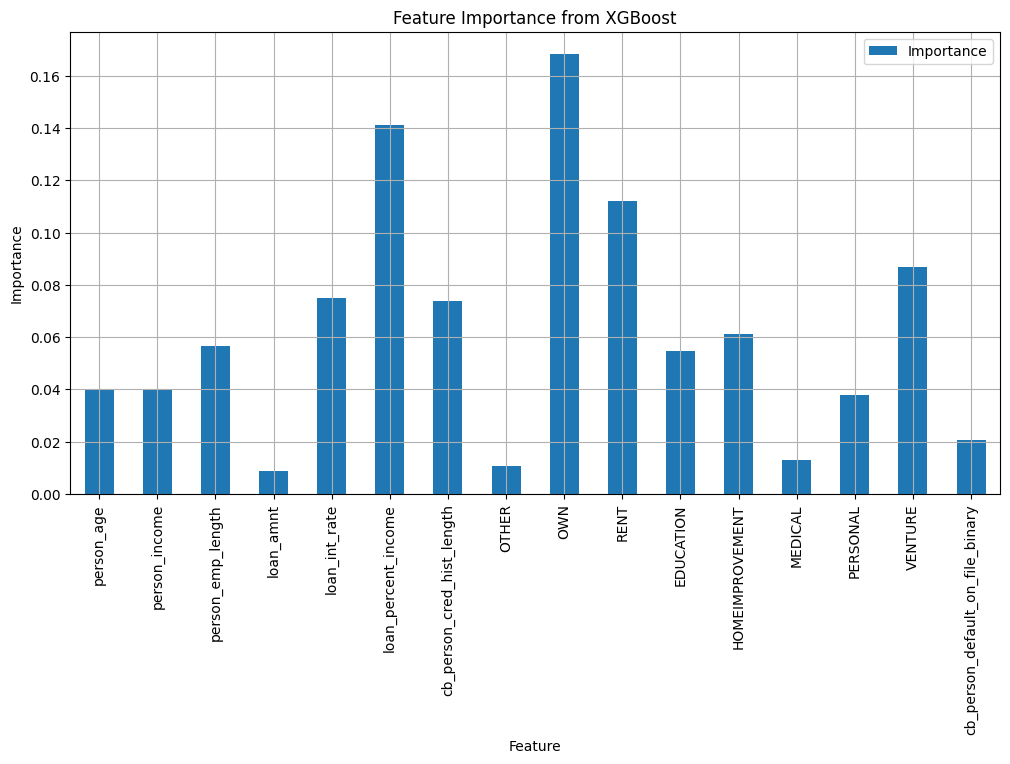

In [93]:
features_imp_xbg = pd.DataFrame({'Feature': balanced_features.columns, 'Importance': xgb.feature_importances_})
features_imp_xb = features_imp_xbg.sort_values(by='Importance', ascending=False)
features_imp_xbg.plot(x='Feature', y='Importance', kind='bar', figsize=(12,6))
plt.title('Feature Importance from XGBoost')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.grid()
plt.show()

In [94]:
features_imp = pd.concat([features_imp_logreg.set_index('Feature'), features_imp_rf.set_index('Feature'), features_imp_xbg.set_index('Feature')], axis=1)
features_imp.columns = ['Logistic_Regression_Importance', 'Random_Forest_Importance', 'XGBoost_Importance']
features_imp   

,Logistic_Regression_Importance,Random_Forest_Importance,XGBoost_Importance
Feature,,,
loan_percent_income,1.388775,0.210153,0.141169
loan_int_rate,0.989878,0.209661,0.074900
RENT,0.463395,0.047872,0.112187
person_income,0.078015,0.145396,0.039851
cb_person_default_on_file_binary,0.064250,0.020948,0.020483
person_age,-0.019461,0.062929,0.039832
person_emp_length,-0.025279,0.072470,0.056583
cb_person_cred_hist_length,-0.031282,0.060229,0.073721
HOMEIMPROVEMENT,-0.303589,0.016234,0.061077


## FURTHER EXPLORATION

In [98]:
xgb_prediction_df = pd.DataFrame({"test_indices_xgb": X_test.index, "xgb_prediction": xgb_prediction})
xgb_prediction_df.head()

,test_indices_xgb,xgb_prediction
0,24808,0
1,9935,0
2,14054,0
3,147,0
4,4070,1


In [99]:
logreg_prediction_df = pd.DataFrame({"test_indices_logreg": X_test.index, "logreg_prediction": logreg_prediction})
logreg_prediction_df.head()

,test_indices_logreg,logreg_prediction
0,24808,0
1,9935,0
2,14054,0
3,147,0
4,4070,0


In [100]:
rf_prediction_df = pd.DataFrame({"test_indices_rf": X_test.index, "rf_prediction": rf_prediction})
rf_prediction_df.head()

,test_indices_rf,rf_prediction
0,24808,0
1,9935,0
2,14054,0
3,147,0
4,4070,1


In [ ]:
merged_with_orig = cr_data_copy.merge(xgb_prediction_df, left_index=True, right_on='test_indices_xgb', how='left')
merged_with_orig.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,test_indices_xgb,xgb_prediction
NaN,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0,NaN
9831.0,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,1,1.0
NaN,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,2,NaN
NaN,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,3,NaN
442.0,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,4,1.0


In [102]:
merged_with_orig = merged_with_orig.merge(rf_prediction_df, left_index=True, right_on='test_indices_rf', how='left')
merged_with_orig.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,test_indices_xgb,xgb_prediction,test_indices_rf,rf_prediction
NaN,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0,NaN,NaN,NaN
NaN,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,1,1.0,9831.0,NaN
NaN,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,2,NaN,NaN,NaN
NaN,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,3,NaN,NaN,NaN
NaN,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,4,1.0,442.0,NaN


In [103]:
merged_with_orig = merged_with_orig.merge(logreg_prediction_df, left_index=True, right_on='test_indices_logreg', how='left')
merged_with_orig.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,test_indices_xgb,xgb_prediction,test_indices_rf,rf_prediction,test_indices_logreg,logreg_prediction
NaN,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0,NaN,NaN,NaN,NaN,NaN
NaN,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,1,1.0,9831.0,NaN,NaN,NaN
NaN,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,2,NaN,NaN,NaN,NaN,NaN
NaN,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,3,NaN,NaN,NaN,NaN,NaN
NaN,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,4,1.0,442.0,NaN,NaN,NaN


In [104]:
merged_with_orig.shape

(31671, 17)

In [106]:
merged_with_orig.dropna(inplace=True)

In [107]:
merged_with_orig.shape

(273, 17)

In [108]:
merged_with_orig.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,test_indices_xgb,xgb_prediction,test_indices_rf,rf_prediction,test_indices_logreg,logreg_prediction
7782.0,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4,6,1.0,5893.0,0.0,8675.0,1.0
7968.0,25,12600,OWN,3.0,PERSONAL,1750,13.61,0,0.14,N,3,103,0.0,3308.0,1.0,3755.0,0.0
9251.0,22,153000,MORTGAGE,5.0,DEBTCONSOLIDATION,24000,15.62,1,0.16,Y,2,341,1.0,2116.0,1.0,2186.0,0.0
5662.0,22,16094,MORTGAGE,2.0,VENTURE,5500,7.14,1,0.34,N,3,351,1.0,3229.0,0.0,9057.0,1.0
143.0,21,18000,OWN,1.0,PERSONAL,2500,11.36,0,0.14,N,3,454,0.0,1442.0,1.0,9313.0,0.0


In [109]:
final_data_with_pred = merged_with_orig.drop(['test_indices_xgb', 'test_indices_rf', 'test_indices_logreg'], axis=1)
final_data_with_pred.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,xgb_prediction,rf_prediction,logreg_prediction
7782.0,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4,1.0,0.0,1.0
7968.0,25,12600,OWN,3.0,PERSONAL,1750,13.61,0,0.14,N,3,0.0,1.0,0.0
9251.0,22,153000,MORTGAGE,5.0,DEBTCONSOLIDATION,24000,15.62,1,0.16,Y,2,1.0,1.0,0.0
5662.0,22,16094,MORTGAGE,2.0,VENTURE,5500,7.14,1,0.34,N,3,1.0,0.0,1.0
143.0,21,18000,OWN,1.0,PERSONAL,2500,11.36,0,0.14,N,3,0.0,1.0,0.0


In [111]:
final_data_with_pred.to_csv('credit_risk_with_model_predictions.csv', index=False)
final_data_with_pred.to_excel('credit_risk_with_model_predictions.xlsx', index=False)